# DAT210x - Programming with Python for DS

## Module4- Lab1

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement
import datetime
from sklearn.decomposition import PCA


In [62]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [63]:
reduce_factor = 100

Load up the scanned armadillo:

In [64]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [66]:
def do_PCA(armadillo, svd_solver):
    # .. your code here ..
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    return T


def do_RandomizedPCA(armadillo):
    from sklearn.decomposition import RandomizedPCA
    rpca = RandomizedPCA(n_components = 2)
    rcpa.fit(armadillo)
    R = rpca.transform(armadillo)
    return R

### Preview the Data

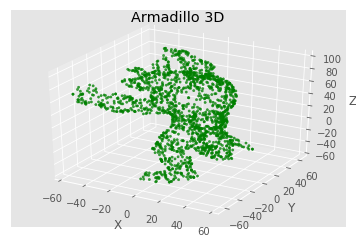

In [93]:
# Render the Original Armadillo

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

plt.show()


### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [69]:
%timeit pca = do_PCA(armadillo, 'full')

1000 loops, best of 3: 1.77 ms per loop


Render the newly transformed PCA armadillo!

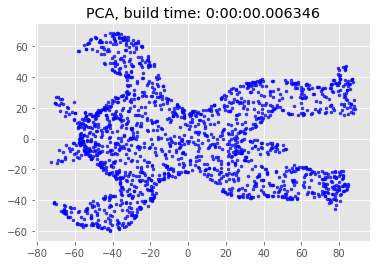

In [91]:
t1 = datetime.datetime.now()
pca = do_PCA(armadillo, svd_solver='auto')
time_delta = datetime.datetime.now() - t1


if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
    
    
#Let's see what the results look like:

plt.show()


Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [87]:
%timeit rpca = do_PCA(armadillo, 'randomized')

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.79 ms per loop
